# Waterfilling Levels

In [2]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)

<module 'food_bank_functions' from '../../functions\\food_bank_functions.py'>

### Test

In [3]:
n = 6
sorted_distribution = np.asarray([np.arange(2) + 1 for x in range(n)])
weights = np.asarray([np.zeros(2)+0.5 for x in range(n)])
expected_demand = 1.5
max_budget = n * expected_demand

In [4]:
print(max_budget)

9.0


In [6]:
group_demands = [2, 1, 1, 1, 2, 1]

In [7]:
print(waterfilling_waste(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [8]:
print(greedy(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [10]:
print(constant_threshold(group_demands,max_budget,expected_demand))

[1.5 1.  1.  1.  1.5 1. ]


In [11]:
print(waterfilling_proportional_remaining(group_demands, max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [12]:
print(waterfilling_dynamic_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [13]:
print(waterfilling_dynamic_full_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [14]:
print(waterfilling_weights_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


In [15]:
print(waterfilling_weights_full_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


# Experiments

## Varying Number of Groups

In [16]:
num_iterations = 50
max_n = 100
sorted_distribution = [1, 2]
weights = [1,2]
expected_demand = np.dot([1,2],[1/2, 1/2])
max_budget = max_n*expected_demand

In [14]:
print(weights)

[1, 2]


### Look at scaling with n

In [15]:
data_dict = {'NumGroups':[], 'Norm':[], 'Dynamic':[],'Weights':[], 'Adapt_Threshold':[], 'Threshold':[],'Greedy':[], 'Dynamic_Full':[], 'Weights_Full':[]}

for n in np.arange(2,max_n+1,1):
    n = max(int(n),1)
    group_expected_demands = np.zeros(n) + 1.5    
    budget = n*1.5
    print(n)
    for i in range(num_iterations):
        data_dict['NumGroups'].append(n)

        
        group_demands = np.random.choice(size=n, a=[1,2], p=[1/2, 1/2])
        opt = waterfilling_waste(group_demands,budget)
        
        weights_sol = waterfilling_weights_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        weights_full_sol = waterfilling_weights_full_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        dynamic = waterfilling_dynamic_waste(group_expected_demands,group_demands,budget)
        dynamic_full = waterfilling_dynamic_full_waste(group_expected_demands, group_demands, budget)
        proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
        greed_sol = greedy(group_demands,budget)
        threshold = constant_threshold(group_demands,budget,expected_demand)
        
        data_dict['Norm'].append('L1')
        data_dict['Weights'].append(np.sum(np.absolute(opt - weights_sol)))
        data_dict['Dynamic'].append(np.sum(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.sum(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.sum(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.sum(np.absolute(opt-threshold)))
        data_dict['Dynamic_Full'].append(np.sum(np.absolute(opt-dynamic_full)))
        data_dict['Weights_Full'].append(np.sum(np.absolute(opt-weights_full_sol)))
        
        data_dict['NumGroups'].append(n)
        data_dict['Norm'].append('Linf')
        data_dict['Weights'].append(np.max(np.absolute(opt - weights_sol)))
        data_dict['Dynamic'].append(np.max(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.max(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.max(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.max(np.absolute(opt-threshold)))
        data_dict['Dynamic_Full'].append(np.max(np.absolute(opt-dynamic_full)))
        data_dict['Weights_Full'].append(np.max(np.absolute(opt-weights_full_sol)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [16]:
df = pd.DataFrame(data_dict).melt(id_vars=["NumGroups", 'Norm'])

In [17]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [18]:
df.head

<bound method NDFrame.head of        NumGroups  Norm      variable     value
0              2    L1       Dynamic  0.500000
1              2  Linf       Dynamic  0.500000
2              2    L1       Dynamic  0.000000
3              2  Linf       Dynamic  0.000000
4              2    L1       Dynamic  0.500000
...          ...   ...           ...       ...
69295        100  Linf  Weights_Full  0.095436
69296        100    L1  Weights_Full  0.000000
69297        100  Linf  Weights_Full  0.000000
69298        100    L1  Weights_Full  0.000000
69299        100  Linf  Weights_Full  0.000000

[69300 rows x 4 columns]>

<AxesSubplot:title={'center':'Simple Distribution L1'}, xlabel='NumGroups', ylabel='value'>

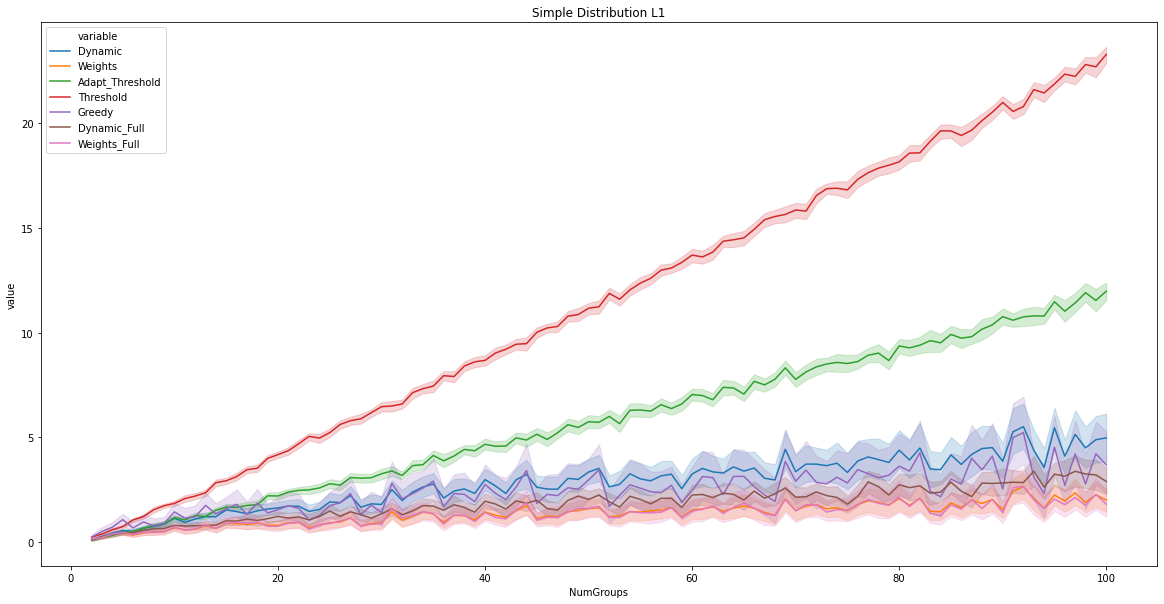

In [19]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution L1')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'L1'])

<AxesSubplot:title={'center':'Simple Distribution LInf'}, xlabel='NumGroups', ylabel='value'>

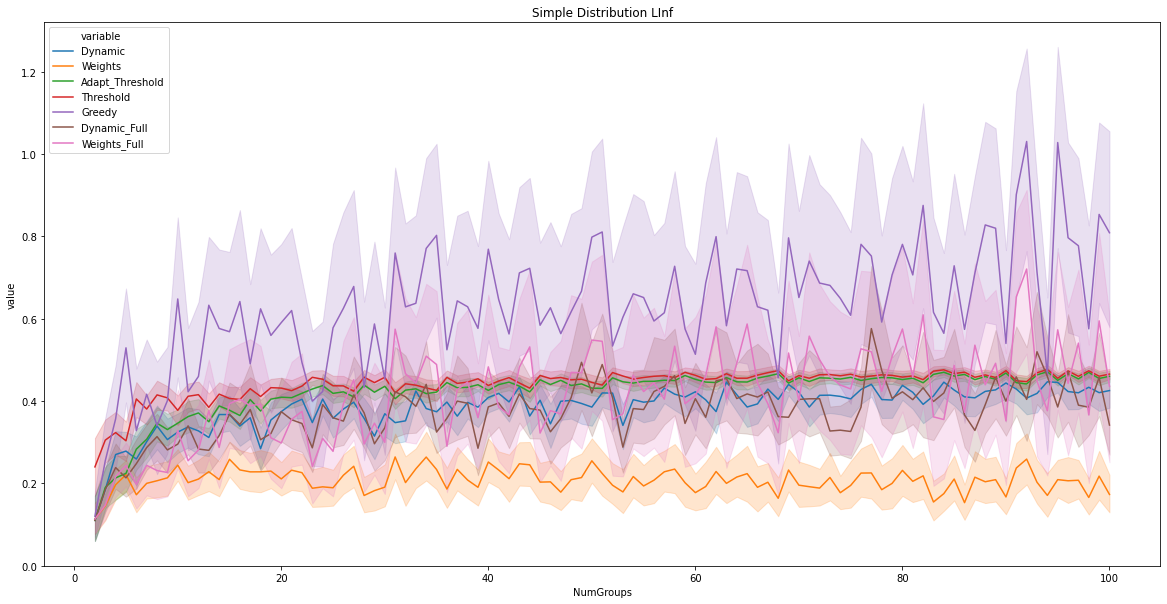

In [20]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution LInf')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'Linf'])

In [54]:
data_dict = {'Group':[], 'Weights_Full':[], 'Weights_Online':[],'Dynamic_Full':[], 'Dynamic_Online':[], 'True':[]}
num_iterations = 1

for i in range(num_iterations):
    
    # num_iterations = 1
    max_n = 100
    sorted_distribution = np.asarray([np.arange(2) + 1 for x in range(max_n)])
    weights = np.asarray([np.zeros(2)+0.5 for x in range(max_n)])
    expected_demands = [1.5 for x in range(max_n)]
    max_budget = max_n*1.5
    
    
    
    group_demands = np.random.choice(size=max_n, a=[1,2], p=[1/2, 1/2])
    print('Demands for experiment:' + str(group_demands))
    
    dynamic_full = np.copy(expected_demands)
    dynamic_online = np.sort(np.copy(expected_demands))
    
    dynamic_online_budget = max_budget
    weights_online_budget = max_budget
    
    weights_online_support = [1, 2]
    weights_online_vals = [.5*max_n, .5*max_n]
    
    weights_full_support = [1, 2]
    weights_full_vals = [.5*max_n, .5*max_n]
    
    for n in range(max_n):
        # Solve for the various waterfilling levels
        data_dict['Group'].append(n)
        
        # Adds on the true waterfilling level
        data_dict['True'].append(max(waterfilling_sorted(np.sort(np.copy(group_demands)), max_budget)))
        
        
        # Dynamic_Full
        
        # Replaces current town's demand with realized demand
        dynamic_full[n] = group_demands[n]
        # Sorts demands
        dynamic_full_sorted = np.sort(dynamic_full)
        # Appends maximum allocation based on full demand with full budget
        data_dict['Dynamic_Full'].append(max(waterfilling_sorted(dynamic_full_sorted, max_budget)))
        
        # Dynamic_Online
        
        # Removes expected demand for current agent from list
        dynamic_online = delete_sorted(dynamic_online, expected_demands[n])
        
        # adds in the demand for current location
        new_sorted_list, index = insert_sorted(dynamic_online, group_demands[n])
        tmp_sol = waterfilling_sorted(new_sorted_list, dynamic_online_budget)
        data_dict['Dynamic_Online'].append(max(tmp_sol))
        # subtracts off the allocation for the next round
        dynamic_online_budget -= min(tmp_sol[index], dynamic_online_budget, group_demands[n])
        
        
        # Weights_Full
        
        # Updating the weights for the observed group
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(weights_full_support - obs_demand))
        weights_full_vals[index] += .5
        weights_full_vals[~index] -= .5
        
        data_dict['Weights_Full'].append(max(waterfilling_sorted_weights(weights_full_support, weights_full_vals, max_budget)))
        
        
        # Weights_Online
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(weights_online_support - obs_demand))
        weights_online_vals[index] += .5
        weights_online_vals[~index] -= .5
        
        
        
        tmp_sol = waterfilling_sorted_weights(weights_online_support, weights_online_vals, weights_online_budget)
        weights_online_budget -= min(obs_demand, weights_online_budget, tmp_sol[index])
        
        weights_online_vals[index] -= 1
        data_dict['Weights_Online'].append(max(tmp_sol))

Demands for experiment:[2 2 1 2 2 2 1 2 2 1 2 1 2 1 1 2 2 2 1 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 2 2 1
 2 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2 1 2 1 2 2 1
 2 1 2 1 2 2 2 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1]


In [55]:
np.std(data_dict['True'])

0.0

In [56]:
df.columns

Index(['Group', 'variable', 'value'], dtype='object')

In [57]:
df = pd.DataFrame(data_dict).melt(id_vars="Group")
df = df[df.variable != 'Dynamic_Online']
df = df[df.variable != 'Dynamic_Full']

Text(0.5, 0, 'Estimated Level')

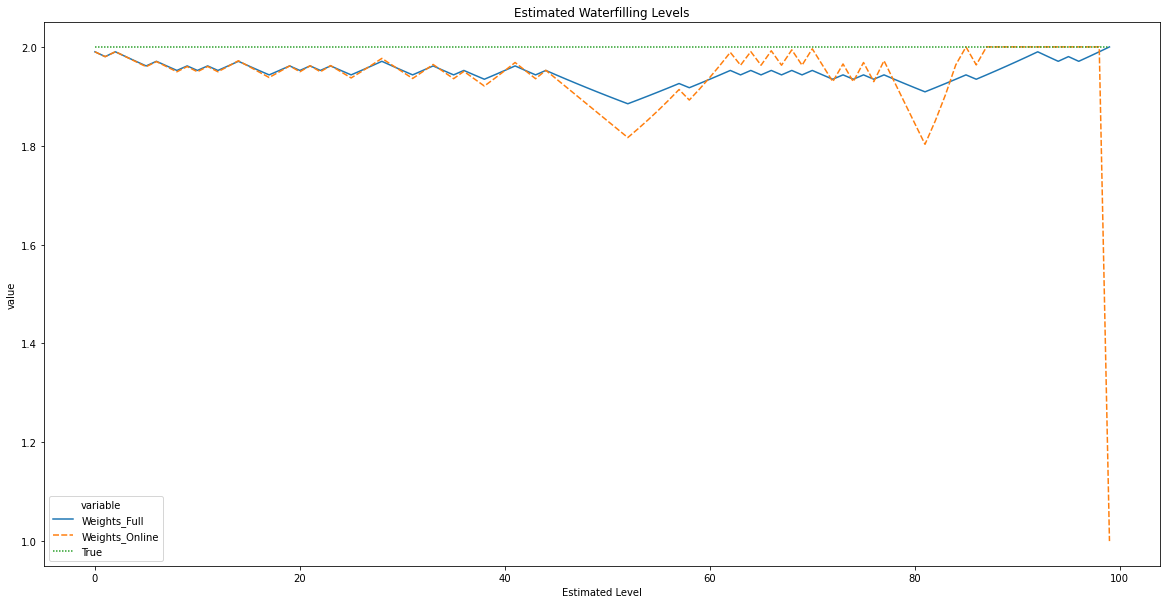

In [58]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', style='variable', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')